In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

In [3]:
sys.path.append(os.path.abspath(os.path.join('../script')))
from clean_data import Preprocess

In [4]:
preprocess = Preprocess()

In [5]:
train_df = pd.read_csv('../data/train_data.csv')
train_df

,Date,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,...,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,2015-07-31,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,...,5,5263,555,1,1,0,1,2015,7,31
1,2015-07-30,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,...,4,5020,546,1,1,0,1,2015,7,30
2,2015-07-29,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,...,3,4782,523,1,1,0,1,2015,7,29
3,2015-07-28,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,...,2,5011,560,1,1,0,1,2015,7,28
4,2015-07-27,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,...,1,6102,612,1,1,0,1,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2013-01-05,1115,d,c,20.0,4.0,2006.0,1,22.0,2012.0,...,6,4771,339,1,0,0,1,2013,1,5
1017205,2013-01-04,1115,d,c,20.0,4.0,2006.0,1,22.0,2012.0,...,5,4540,326,1,0,0,1,2013,1,4
1017206,2013-01-03,1115,d,c,20.0,4.0,2006.0,1,22.0,2012.0,...,4,4297,300,1,0,0,1,2013,1,3
1017207,2013-01-02,1115,d,c,20.0,4.0,2006.0,1,22.0,2012.0,...,3,3697,305,1,0,0,1,2013,1,2


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date                       1017209 non-null  object 
 1   Store                      1017209 non-null  int64  
 2   StoreType                  1017209 non-null  object 
 3   Assortment                 1017209 non-null  object 
 4   CompetitionDistance        1017209 non-null  float64
 5   CompetitionOpenSinceMonth  1017209 non-null  float64
 6   CompetitionOpenSinceYear   1017209 non-null  float64
 7   Promo2                     1017209 non-null  int64  
 8   Promo2SinceWeek            1017209 non-null  float64
 9   Promo2SinceYear            1017209 non-null  float64
 10  PromoInterval              1017209 non-null  object 
 11  DayOfWeek                  1017209 non-null  int64  
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [7]:
train_df.head()

,Date,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,...,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,2015-07-31,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,...,5,5263,555,1,1,0,1,2015,7,31
1,2015-07-30,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,...,4,5020,546,1,1,0,1,2015,7,30
2,2015-07-29,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,...,3,4782,523,1,1,0,1,2015,7,29
3,2015-07-28,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,...,2,5011,560,1,1,0,1,2015,7,28
4,2015-07-27,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,...,1,6102,612,1,1,0,1,2015,7,27


In [8]:
train_df.isnull().sum()

Date                         0
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
year                         0
month                        0
day                          0
dtype: int64

It seems like the data have no null value.

In [9]:
missing_df = train_df[['PromoInterval', 'Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance', 'Open']]
missing_df.head(10)

,PromoInterval,Promo2SinceYear,Promo2SinceWeek,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionDistance,Open
0,"Jan,Apr,Jul,Oct",2010.0,13.0,9.0,2008.0,20.0,1
1,"Jan,Apr,Jul,Oct",2010.0,13.0,9.0,2008.0,20.0,1
2,"Jan,Apr,Jul,Oct",2010.0,13.0,9.0,2008.0,20.0,1
3,"Jan,Apr,Jul,Oct",2010.0,13.0,9.0,2008.0,20.0,1
4,"Jan,Apr,Jul,Oct",2010.0,13.0,9.0,2008.0,20.0,1
5,"Jan,Apr,Jul,Oct",2010.0,13.0,9.0,2008.0,20.0,0
6,"Jan,Apr,Jul,Oct",2010.0,13.0,9.0,2008.0,20.0,1
7,"Jan,Apr,Jul,Oct",2010.0,13.0,9.0,2008.0,20.0,1
8,"Jan,Apr,Jul,Oct",2010.0,13.0,9.0,2008.0,20.0,1
9,"Jan,Apr,Jul,Oct",2010.0,13.0,9.0,2008.0,20.0,1


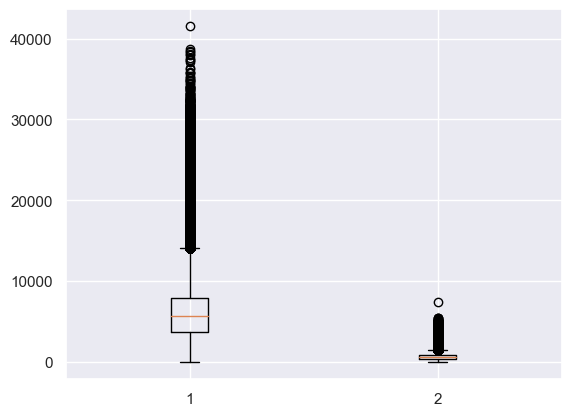

In [10]:
sns.set()
plt.boxplot(train_df[['Sales', 'Customers']])
plt.show()

In [11]:
df = preprocess.replace_outliers_iqr(train_df, ['Sales', 'Customers'])

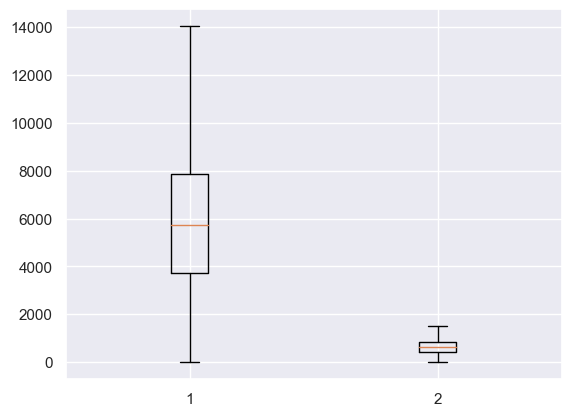

In [12]:
sns.set()
plt.boxplot(train_df[['Sales', 'Customers']])
plt.show()

In [16]:
train_df.head()

,Date,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,2015-07-31,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",5,5263.0,1,1,0,1,2015,7,31
1,2015-07-30,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",4,5020.0,1,1,0,1,2015,7,30
2,2015-07-29,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",3,4782.0,1,1,0,1,2015,7,29
3,2015-07-28,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,5011.0,1,1,0,1,2015,7,28
4,2015-07-27,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",1,6102.0,1,1,0,1,2015,7,27


we can drop 'customer' because it is not in test data.

In [14]:
train_df.drop('Customers',inplace = True, axis=1)

Label encoding

In [15]:
categorical_columns = ['PromoInterval', 'Assortment', 'StoreType']

# Label encoding
label_encoded_columns = preprocess.label_encode(train_df, categorical_columns)

In [17]:
train_df.drop(categorical_columns, axis=1, inplace=True)

# Merge DataFrames
train_df = pd.concat([train_df, label_encoded_columns], axis=1)

In [18]:
train_df.dtypes

Date                          object
Store                          int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
DayOfWeek                      int64
Sales                        float64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
year                           int64
month                          int64
day                            int64
PromoInterval                  int32
Assortment                     int32
StoreType                      int32
dtype: object

In [20]:
train_df.sort_values(["Store"], ignore_index=True, inplace=True)
train_df.sort_values(["year","month","day"], ascending=False ,ignore_index=True, inplace=True)

Now we can get the correlation matrix for the target variable.

In [21]:
corr_matrix = train_df.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales                        1.000000
Open                         0.715977
Promo                        0.468557
SchoolHoliday                0.088484
Assortment                   0.074635
month                        0.045805
Promo2SinceWeek              0.027294
year                         0.025718
CompetitionOpenSinceYear     0.011613
Store                        0.003404
StoreType                   -0.004961
CompetitionOpenSinceMonth   -0.005662
day                         -0.011411
Promo2SinceYear             -0.014341
PromoInterval               -0.014870
Promo2                      -0.084233
DayOfWeek                   -0.481886
CompetitionDistance               NaN
Name: Sales, dtype: float64

save our cleand train and store combination to a csv file.

In [22]:
train_df.to_csv('../data/train_store_processed.csv', index=True)